In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/testdata/download.jpeg
/kaggle/input/testdata/download (1).jpeg


In [2]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="Qxsf9qGS4KtafXoscMjJ")
project = rf.workspace("jd-coins").project("jd-coins-detection")
model = project.version(1).model
!pip install roboflow

# infer on a local image
print(model.predict("/kaggle/input/testdata/download (1).jpeg", confidence=40, overlap=30).json())

# visualize your prediction
# model.predict("your_image.jpg", confidence=40, overlap=30).save("prediction.jpg")

# infer on an image hosted elsewhere
# print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 31.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="e2NRiLm6ZN2yD23yWWEm")
project = rf.workspace("coins-jkzui").project("coin-detection-lvpg5")
model = project.version(3).model


# infer on a local image
print(model.predict("/kaggle/input/testdata/download.jpeg", confidence=40, overlap=30).json())


response=model.predict("/kaggle/input/testdata/download.jpeg", confidence=40, overlap=30).json()

total=0
for pred in response['predictions']:
    total += float(pred['class'])
print(total)
# visualize your prediction
# model.predict("your_image.jpg", confidence=40, overlap=30).save("prediction.jpg")

# infer on an image hosted elsewhere
# print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())

loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 98.5, 'y': 148.0, 'width': 53.0, 'height': 54.0, 'confidence': 0.9644085168838501, 'class': '0.25', 'class_id': 2, 'detection_id': 'bd04a6ef-d02c-4103-bd0c-baf3c83a1c96', 'image_path': '/kaggle/input/testdata/download.jpeg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 156.0, 'y': 146.5, 'width': 60.0, 'height': 59.0, 'confidence': 0.9451826810836792, 'class': '0.5', 'class_id': 3, 'detection_id': '19c41ed5-dc46-4cc5-b67a-fa2263eb0dd2', 'image_path': '/kaggle/input/testdata/download.jpeg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 220.0, 'y': 147.5, 'width': 60.0, 'height': 59.0, 'confidence': 0.9279624223709106, 'class': '0.5', 'class_id': 3, 'detection_id': 'e8da0798-b2d6-4ecb-b451-61b4e04c269b', 'image_path': '/kaggle/input/testdata/download.jpeg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 97.0, 'y': 86.0, 'width': 44.0, 'height': 44.0, 'confidence': 0.7047539949417114, 'class': '0.

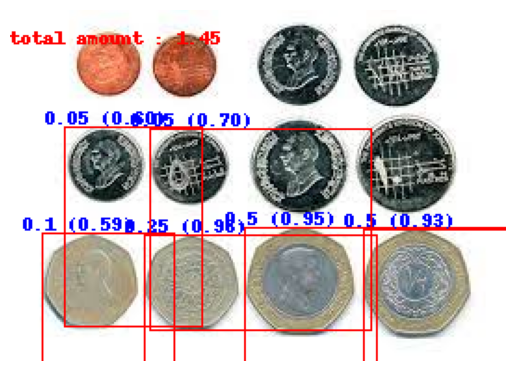

In [17]:
import cv2
from PIL import Image, ImageDraw, ImageFont
import numpy as np


# Load the image
image_path = "/kaggle/input/testdata/download.jpeg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to PIL format
pil_image = Image.fromarray(image)

# Draw prediction boxes
draw = ImageDraw.Draw(pil_image)

for pred in response['predictions']:
    x, y = pred['x']-pred['width']/2, pred['y']-pred['height']/2
    width, height = pred['x']+pred['width']/2,  pred['y']+pred['height']/2
    class_name = pred['class']
    confidence = pred['confidence']
    
    # Draw bounding box
    draw.rectangle([(x, y), (x + width, y + height)], outline="red")
    
    # Draw text label
    label = f"{class_name} ({confidence:.2f})"
    draw.text((x-10, y-10), label, fill="blue")
    draw.text((0,10), "total amount : "+str(round(total,2)), fill="red")

# Convert image back to OpenCV format
image_with_predictions = np.array(pil_image)

# Display the image
import matplotlib.pyplot as plt

# Display the image with predictions using Matplotlib
plt.imshow(image_with_predictions)
plt.axis('off')  # Hide the axes
plt.show()

